In [ ]:
import pandas as pd
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSuOsRw8k8BnnMALRb1jF8wDgXMcchPLYwQurXYgiskj-shlrhP0_25cf65Yw2Cv3sVf3XSCrVSXFXM/pub?gid=432909964&single=true&output=csv")

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
print("Print number of Rows:", df.shape[0])
print("Print number of Columns:", df.shape[1])

Print number of Rows: 205
Print number of Columns: 26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Describing Data

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Preprocessing

In [ ]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


### Outlier Removal

<Axes: >

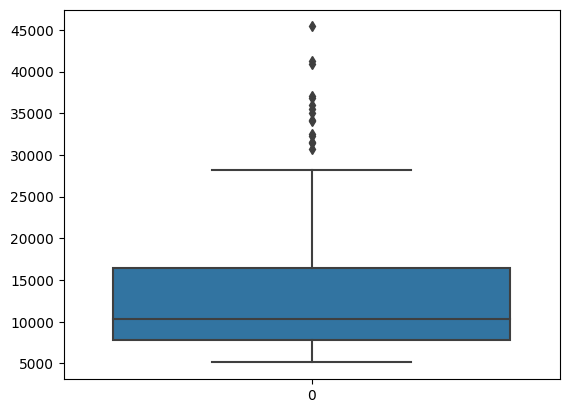

In [ ]:
sns.boxplot(df['price'])

In [ ]:
sorted(df["price"], reverse = True)

[45400.0,
 41315.0,
 40960.0,
 37028.0,
 36880.0,
 36000.0,
 35550.0,
 35056.0,
 34184.0,
 34028.0,
 32528.0,
 32250.0,
 31600.0,
 31400.5,
 30760.0,
 28248.0,
 28176.0,
 25552.0,
 24565.0,
 23875.0,
 22625.0,
 22470.0,
 22018.0,
 21485.0,
 21105.0,
 20970.0,
 19699.0,
 19045.0,
 18950.0,
 18920.0,
 18620.0,
 18420.0,
 18399.0,
 18344.0,
 18280.0,
 18150.0,
 18150.0,
 17950.0,
 17859.167,
 17710.0,
 17669.0,
 17450.0,
 17199.0,
 17075.0,
 16925.0,
 16900.0,
 16845.0,
 16695.0,
 16630.0,
 16558.0,
 16515.0,
 16503.0,
 16500.0,
 16500.0,
 16430.0,
 15998.0,
 15985.0,
 15750.0,
 15690.0,
 15645.0,
 15580.0,
 15510.0,
 15250.0,
 15040.0,
 14869.0,
 14489.0,
 14399.0,
 13950.0,
 13860.0,
 13845.0,
 13645.0,
 13499.0,
 13499.0,
 13495.0,
 13415.0,
 13295.0,
 13200.0,
 12964.0,
 12945.0,
 12940.0,
 12764.0,
 12629.0,
 12440.0,
 12290.0,
 12170.0,
 11900.0,
 11850.0,
 11845.0,
 11694.0,
 11595.0,
 11549.0,
 11259.0,
 11248.0,
 11245.0,
 11199.0,
 11048.0,
 10945.0,
 10898.0,
 10795.0,
 10698.0

In [ ]:
df = df[~(df["price"] >= 40000) & (df['price'] <= 45000)]
df.shape

(202, 26)

### Encoding the Categorical Columns

In [ ]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [ ]:
print(df['fueltype'].unique())
print(df['aspiration'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginelocation'].unique())
print(df['enginetype'].unique())
print(df['cylindernumber'].unique())
print(df['fuelsystem'].unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [ ]:
fuelMap = {'gas': 0, 'diesel': 1}
aspMap = {'std': 0, 'turbo': 1}
doorMap = {'two': 2, 'four': 4}
bodyMap = {'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4}
wheelMap = {'rwd': 0, 'fwd': 1, '4wd': 2}
engineLocMap = {'front': 0, 'rear': 1}
engineTypeMap = {'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6}
cylinderMap = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
fuelSysMap = {'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7}

In [ ]:
df['fueltype'] = df['fueltype'].map(fuelMap)
df['fueltype'].unique()

<ipython-input-16-292d419a75e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fueltype'] = df['fueltype'].map(fuelMap)


array([0, 1])

In [ ]:
df['aspiration'] = df['aspiration'].map(aspMap)
df['aspiration'].unique()

<ipython-input-17-01cd1a3713ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aspiration'] = df['aspiration'].map(aspMap)


array([0, 1])

In [ ]:
df['doornumber'] = df['doornumber'].map(doorMap)
df['doornumber'].unique()

<ipython-input-18-f4377a5be055>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['doornumber'] = df['doornumber'].map(doorMap)


array([2, 4])

In [ ]:
df['carbody'] = df['carbody'].map(bodyMap)
df['carbody'].unique()

<ipython-input-19-db522e034d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carbody'] = df['carbody'].map(bodyMap)


array([0, 1, 2, 3, 4])

In [ ]:
df['drivewheel'] = df['drivewheel'].map(wheelMap)
df['drivewheel'].unique()

<ipython-input-20-d37a602ce1b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drivewheel'] = df['drivewheel'].map(wheelMap)


array([0, 1, 2])

In [ ]:
df['enginelocation'] = df['enginelocation'].map(engineLocMap)
df['enginelocation'].unique()

<ipython-input-21-8dd95b048e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enginelocation'] = df['enginelocation'].map(engineLocMap)


array([0, 1])

In [ ]:
df['enginetype'] = df['enginetype'].map(engineTypeMap)
df['enginetype'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
df['cylindernumber'] = df['cylindernumber'].map(cylinderMap)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [ ]:
df['fuelsystem'] = df['fuelsystem'].map(fuelSysMap)
df['fuelsystem'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


## Storing Features and Target Variable

In [ ]:
X = df.drop(['car_ID', 'CarName', 'price'], axis = 1)
Y = df['price']

In [ ]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,2,0,0,0,88.6,168.8,64.1,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,2,0,0,0,88.6,168.8,64.1,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,2,1,0,0,94.5,171.2,65.5,...,6,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,0,0,4,2,1,0,99.8,176.6,66.2,...,4,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,0,0,4,2,2,0,99.4,176.6,66.4,...,5,136,0,3.19,3.40,8.0,115,5500,18,22


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         202 non-null    int64  
 1   fueltype          202 non-null    int64  
 2   aspiration        202 non-null    int64  
 3   doornumber        202 non-null    int64  
 4   carbody           202 non-null    int64  
 5   drivewheel        202 non-null    int64  
 6   enginelocation    202 non-null    int64  
 7   wheelbase         202 non-null    float64
 8   carlength         202 non-null    float64
 9   carwidth          202 non-null    float64
 10  carheight         202 non-null    float64
 11  curbweight        202 non-null    int64  
 12  enginetype        202 non-null    int64  
 13  cylindernumber    202 non-null    int64  
 14  enginesize        202 non-null    int64  
 15  fuelsystem        202 non-null    int64  
 16  boreratio         202 non-null    float64
 1

In [ ]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 202, dtype: float64

## Splitting Dataset into Training Set and Test Set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

## Import Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Model Training

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

gradBoost = GradientBoostingRegressor()
gradBoost.fit(X_train, Y_train)

xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Prediction on Test Set

In [ ]:
Y_pred1 = lr.predict(X_test)
Y_pred2 = rf.predict(X_test)
Y_pred3 = gradBoost.predict(X_test)
Y_pred4 = xgb.predict(X_test)

## Evaluating Algorithm

In [ ]:
from sklearn import metrics

In [ ]:
scoreLR = metrics.r2_score(Y_test, Y_pred1)
scoreRF = metrics.r2_score(Y_test, Y_pred2)
scoreGB = metrics.r2_score(Y_test, Y_pred3)
scoreXG = metrics.r2_score(Y_test, Y_pred4)

In [ ]:
print(scoreLR, scoreRF, scoreGB, scoreXG)

0.8270375694192572 0.8884787727321337 0.9207804902483271 0.9060279777359385


In [ ]:
r2Scores = pd.DataFrame({'Models': ['Linear Regressor', 'Random Forest Regressor', 'Gradient Boost Regressor', 'XGB Rehressor'],
              'R2 Score': [scoreLR, scoreRF, scoreGB, scoreXG]})

In [ ]:
r2Scores

,Models,R2 Score
0,Linear Regressor,0.827038
1,Random Forest Regressor,0.888479
2,Gradient Boost Regressor,0.920780
3,XGB Rehressor,0.906028


<Axes: xlabel='R2 Score', ylabel='Models'>

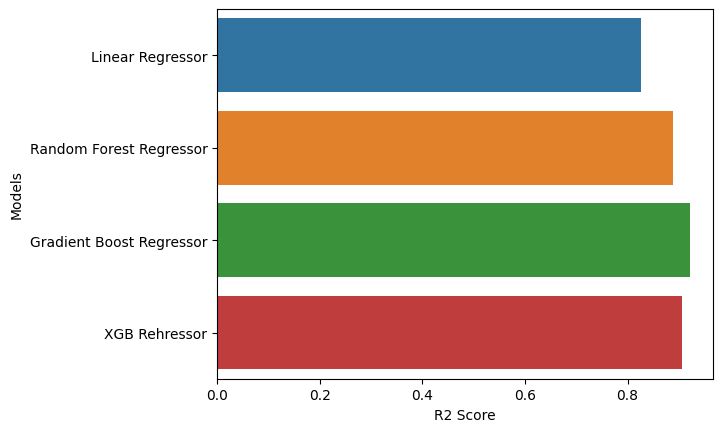

In [ ]:
sns.barplot(x='R2 Score', y = 'Models', data=r2Scores)

## Saving the Model

In [ ]:
gradBoost = GradientBoostingRegressor()
gbFinal = gradBoost.fit(X, Y)

In [ ]:
import joblib

In [ ]:
joblib.dump(gbFinal, 'carPricePredictor')

['carPricePredictor']

In [ ]:
model = joblib.load('carPricePredictor')

## Predicting New Data

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
symboling = int(input("Symboling: "))
fuelType = fuelMap[input("Fuel Type: ")]
aspiration = aspMap[input("Aspiration: ")]
doorNumber = doorMap[input("Door Number: ")]
carBody = bodyMap[input("Car Body: ")]
driveWheel = wheelMap[input("Drive Wheel: ")]
engineLocation = engineLocMap[input("Engine Location: ")]
wheelBase = float(input("Wheel Base: "))
carLength = float(input("Car Length: "))
carWidth = float(input("Car Width: "))
carHeight = float(input("Car Height: "))
curbWeight = int(input("Curb Weight: "))
engineType = engineTypeMap[input("Engine Type: ")]
cylinderNumber = int(input("Cylinder Number: "))
engineSize = int(input("Engine Size: "))
fuelSystem = fuelSysMap[input("Fuel System: ")]
boreRatio = float(input("Bore Ratio: "))
stroke = float(input("Stroke: "))
compressRatio = float(input("Compress Ratio: "))
horsePower = int(input("Horse Power: "))
peakRPM = int(input("Peak RPM: "))
cityMPG = int(input("City MPG: "))
highwayMPG = int(input("Highway MPG: "))

newData = pd.DataFrame({
    'symboling': [symboling],
    'fueltype': [fuelType],
    'aspiration': [aspiration],
    'doornumber': [doorNumber],
    'carbody': [carBody],
    'drivewheel': [driveWheel],
    'enginelocation': [engineLocation],
    'wheelbase': [wheelBase],
    'carlength': [carLength],
    'carwidth': [carWidth],
    'carheight': [carHeight],
    'curbweight': [curbWeight],
    'enginetype':  [engineType],
    'cylindernumber':  [cylinderNumber],
    'enginesize':  [engineSize],
    'fuelsystem':  [fuelSystem],
    'boreratio': [boreRatio],
    'stroke': [stroke],
    'compressionratio': [compressRatio],
    'horsepower':  [horsePower],
    'peakrpm':  [peakRPM],
    'citympg':  [cityMPG],
    'highwaympg': [highwayMPG]
})

print(model.predict(newData))

Symboling: 2
Fuel Type: gas
Aspiration: turbo
Door Number: two
Car Body: convertible
Drive Wheel: 4wd
Engine Location: front
Wheel Base: 106.2
Car Length: 197.6
Car Width: 81.7
Car Height: 45.9
Curb Weight: 3284
Engine Type: l
Cylinder Number: 12
Engine Size: 198
Fuel System: idi
Bore Ratio: 3.74
Stroke: 3.9
Compress Ratio: 11.8
Horse Power: 740
Peak RPM: 5500
City MPG: 13
Highway MPG: 18
[37570.43664325]
